In [1]:
# Import required libraries and dependencies
import os
os.environ['OMP_NUM_THREADS'] = '1'
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Additional review from https://www.youtube.com/watch?v=ZddUwo4R5ug
# Display sample data bottom ten
market_data_df.tail(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
ethereum-classic,-0.45950,3.05209,-1.26669,2.89572,-25.90799,10.39203,11.11094
ethlend,-13.52786,4.21266,-9.80075,-29.99499,2.13917,2227.92782,7852.08970
maker,-0.60285,8.15400,-1.48854,16.71360,-18.61722,82.53544,10.65279
havven,-4.07216,4.33651,-13.29164,-20.84154,-39.42657,622.92465,678.78427
omisego,4.84033,6.82985,-13.21636,-9.11552,79.27505,585.26307,320.69054
celsius-degree-token,2.51323,0.60354,24.23919,140.79570,223.06437,1590.19149,2009.72217
ontology,-1.35845,-1.21399,-10.56222,-34.70548,-32.70004,54.76717,-12.65493
ftx-token,0.83416,7.10438,-0.20629,-10.56394,5.90295,57.48950,168.37251
true-usd,-0.06197,0.16642,0.10974,0.03090,0.25154,-0.08874,0.40617


In [5]:
# Additional review from https://www.youtube.com/watch?v=ZddUwo4R5ug
# Display shape of the data

market_data_df.shape

(41, 7)

In [6]:
# Additional review from https://www.youtube.com/watch?v=ZddUwo4R5ug
# Display types of the data


market_data_df.dtypes

price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
dtype: object

In [6]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [7]:
# Get the column names.
market_data_df.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

### Prepare the Data

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(market_data_df)

market_data_scaled[5]

array([ 0.89187071,  1.32729453,  0.80021418, -0.0571479 ,  0.77865311,
       -0.18823192, -0.2255326 ])

In [9]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(market_data_scaled, columns=market_data_df.columns)

# Reset the index of market_data_df
market_data_df_reset = market_data_df.reset_index()

# Copy the crypto names from the original data

market_data_scaled_df['coin_id'] = market_data_df_reset['coin_id']


# Set the coinid column as index 
market_data_scaled_df.set_index('coin_id', inplace=True)


# Display sample data
market_data_scaled_df.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [10]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=2)
    k_model.fit(market_data_scaled)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
df_elbow = {"k": k, "inertia": inertia}


# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(df_elbow)

# Display the DataFrame
df_elbow.head(10)

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,55.763391
6,7,44.237520
7,8,41.068743
8,9,36.933822
9,10,29.836181


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

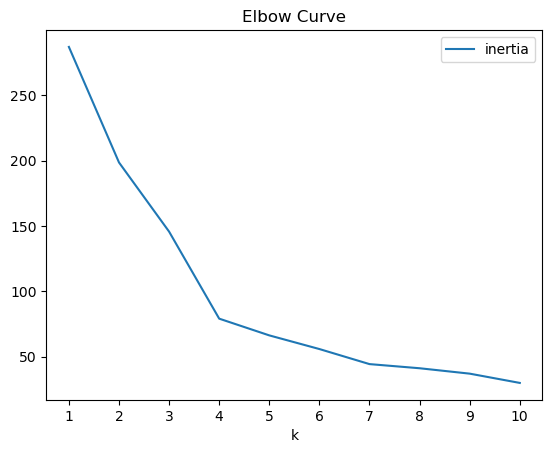

In [11]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x='k',
                   y='inertia', 
                   title='Elbow Curve', 
                   xticks=k)


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**
The best value for k is 4, with inertia approximately between 75 and 100.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [12]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=8, n_init='auto', random_state=1)

In [13]:
# Fit the K-Means model using the scaled data
model.fit(market_data_scaled)

KMeans(n_init='auto', random_state=1)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data

crypto_cluster = model.predict(market_data_scaled)
# View the resulting array of cluster values.
crypto_cluster

array([2, 2, 0, 0, 7, 2, 7, 2, 2, 0, 0, 0, 0, 7, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 4, 0, 0, 0, 2, 6, 0, 0, 3, 2, 0, 5, 1, 0, 2, 0, 0])

In [15]:
# Create a copy of the DataFrame
market_data_scaled_predictions_df = market_data_scaled_df.copy()


In [16]:
# Add a new column to the DataFrame with the predicted clusters
market_data_scaled_predictions_df['crypto_cluster'] = model.labels_

# Display sample data
market_data_scaled_predictions_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,7


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

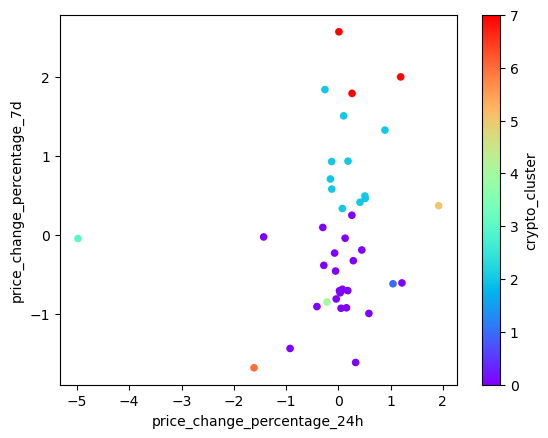

In [17]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_scaled_predictions_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="crypto_cluster",
    colormap="rainbow")

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.

pca = PCA(n_components=3)   

In [19]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_data_pca = pca.fit_transform(market_data_scaled)

# View the first five rows of the DataFrame. 
market_data_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [20]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 
#6/16 updating answer, missing in GitHub
The answer is 89.5% ().372 + .347 + .176 = .895) or 89.5% with on,ly 10.5% variance remaining (not significant)

In [20]:
#6/16: This section was not committed or loaded to Github correctly.

# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you


# Creating a DataFrame with the PCA data

market_data_pca_df = pd.DataFrame(
    market_data_pca,
    columns=["PCA1", "PCA2", "PCA3"]
)  



# Copy the crypto names from the original data
market_data_pca_df['coin_id'] = market_data_df_reset['coin_id']

# Set the coinid column as index
market_data_pca_df.set_index('coin_id', inplace=True)

# Display sample data

market_data_pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [21]:
#6/16: This section was not committed or loaded to Github correctly.
# Create a list with the number of k-values to try
# Use a range from 1 to 11

k = list(range(1, 11))  

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(market_data_pca_df)
    inertia.append(k_model.inertia_)
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}
    

# Create a DataFrame with the data to plot the Elbow curve
elbow_data_pca_df = pd.DataFrame(elbow_data)    

# Display the DataFrame
elbow_data_pca_df.head(10)  

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


<Axes: title={'center': 'elbow_data_pca_df'}, xlabel='k'>

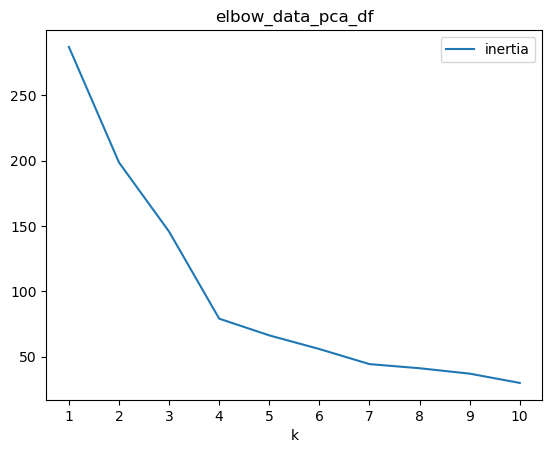

In [22]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="elbow_data_pca_df", 
    xticks=k
)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**    The best value for k is 4, with inertia approximately between 75 and 100.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**   No, graphs appear to be duplicates, inferring that with 3 components making up 89.5% of variance was not impacted by PCA.


### Cluster Cryptocurrencies with K-means Using the PCA Data

In [23]:
# Initialize the K-Means model using the best value for k
model_pca = KMeans(n_clusters=4, n_init='auto', random_state=0) 
            

In [24]:
# Fit the K-Means model using the PCA data
model_pca.fit(market_data_pca_df)   

KMeans(n_clusters=4, n_init='auto', random_state=0)

In [25]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_cluster_pca = model_pca.predict(market_data_pca_df)

# Print the resulting array of cluster values.
crypto_cluster_pca

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [26]:
# Create a copy of the DataFrame with the PCA data
market_data_pca_predictions_df = market_data_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_data_pca_predictions_df["crypto_cluster_pca"] = model_pca.labels_

# Display sample data
market_data_pca_predictions_df.head()

,PCA1,PCA2,PCA3,crypto_cluster_pca
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


<Axes: xlabel='PCA1', ylabel='PCA2'>

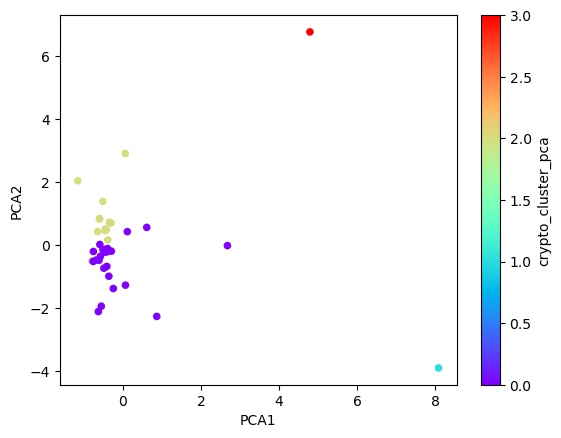

In [27]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 


# Create a scatter plot using Pandas plot by setting 
# `x="PCA1"` and `y="PCA2"`.
# Use "rainbow" for the color to better visualize the data.
market_data_pca_predictions_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="crypto_cluster_pca",
    colormap="rainbow")

### Determine the Weights of Each Feature on each Principal Component

In [28]:
# Use the columns from the original scaled DataFrame as the index.
market_data_scaled_df.index

# Get the number of components and features
num_components = pca.components_.shape[0]
num_features = len(market_data_pca_predictions_df.columns)

# Create column names based on the number of components
column_names = ['PCA' + str(i+1) for i in range(num_components)]

# Create the DataFrame
pca_component_weights = pd.DataFrame(pca.components_.T[:num_features, :num_components], columns=column_names, index=market_data_pca_predictions_df.columns)

pca_component_weights

,PCA1,PCA2,PCA3
PCA1,-0.416728,0.358162,-0.218795
PCA2,-0.102432,0.227432,0.787670
PCA3,-0.009162,0.540415,0.349534
crypto_cluster_pca,0.191523,0.562182,-0.181744


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 

# 6/16
PCA1: Strongest positive influence: crypto_cluster_pca (0.191523)
Strongest negative influence: PCA1 (-0.416728)

PCA2: Strongest positive influence: crypto_cluster_pca (0.562182)
Strongest negative influence: None of the values are negative for PCA2, so the smallest positive value will be considered the least influence.

PCA3: Strongest positive influence: PCA2 (0.787670)
Strongest negative influence: crypto_cluster_pca (-0.181744)
    